## Exploratory Analysis for Jewelry_Type = 'Rings'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import nan
import json
import re
import seaborn as sns

import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score


In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
filename = '/Users/rupalgandhre/SpringBoard/DataScience_Capstone2/data/raw/effy_clean_split_data.csv'
df = pd.read_csv(filename )

In [4]:
df['Jewelry_Type'].value_counts()

Rings                   1104
Necklace and Pendant     690
Earrings                 413
Bracelets                234
Name: Jewelry_Type, dtype: int64

In [5]:
df[df['Jewelry_Type']=='Rings'].describe()

,Discount_Price,Price,Product_Carat,Stone1_Carat,Stone2_Carat,Stone3_Carat,Stone4_Carat,Stone5_Carat,Stone6_Carat
count,1104.000000,1104.000000,1104.000000,1104.000000,580.000000,28.000000,3.000000,2.0,1.0
mean,2912.287591,4591.213768,1.966014,1.803931,0.395328,0.413571,0.023333,0.0,0.0
std,3415.502234,5131.953538,2.245148,2.233570,0.512195,1.103809,0.040415,0.0,NaN
min,157.500000,225.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,1396.500000,2195.000000,0.650000,0.550000,0.130000,0.000000,0.000000,0.0,0.0
50%,2215.000000,3495.000000,1.360000,1.140000,0.270000,0.045000,0.000000,0.0,0.0
75%,3297.500000,5500.000000,2.372500,2.100000,0.470000,0.160000,0.035000,0.0,0.0
max,56350.000000,80500.000000,23.360000,21.160000,4.990000,5.000000,0.070000,0.0,0.0


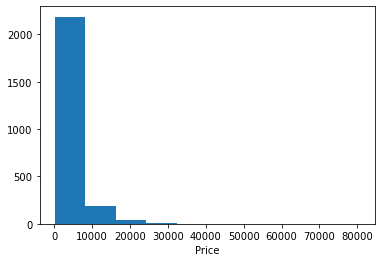

In [6]:
# Making a histogram of the price variable.
_ = plt.hist(df['Price'])
_ = plt.xlabel('Price')
plt.show()

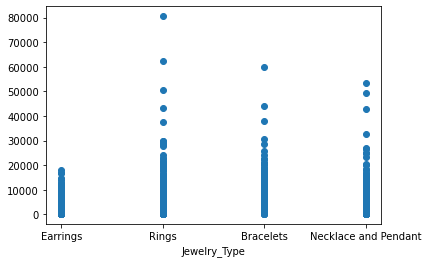

In [7]:
# Making a histogram of the price variable.
_ = plt.scatter(df['Jewelry_Type'], df['Price'])
_ = plt.xlabel('Jewelry_Type')
plt.show()

In [8]:
df_rings = df[df['Jewelry_Type']=='Rings']

In [9]:
df_rings = df_rings.drop(columns=['Stone5_Desc',
       'Stone5_Carat', 'Stone5_Stone', 'Stone5_Color', 'Stone5_Cut',
       'Stone6_Desc', 'Stone6_Carat', 'Stone6_Stone', 'Stone6_Color',
       'Stone6_Cut'])

In [10]:
df_rings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1104 entries, 413 to 1516
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Description     1104 non-null   object 
 1   Discount_Price  1104 non-null   float64
 2   Price           1104 non-null   float64
 3   Metal           1104 non-null   object 
 4   Metal Color     1104 non-null   object 
 5   Stones          1104 non-null   object 
 6   Jewelry_Type    1104 non-null   object 
 7   Product_Carat   1104 non-null   float64
 8   Stone1_Desc     1104 non-null   object 
 9   Stone1_Carat    1104 non-null   float64
 10  Stone1_Stone    1104 non-null   object 
 11  Stone1_Color    1104 non-null   object 
 12  Stone1_Cut      1104 non-null   object 
 13  Stone2_Desc     580 non-null    object 
 14  Stone2_Carat    580 non-null    float64
 15  Stone2_Stone    580 non-null    object 
 16  Stone2_Color    580 non-null    object 
 17  Stone2_Cut      580 non-null   

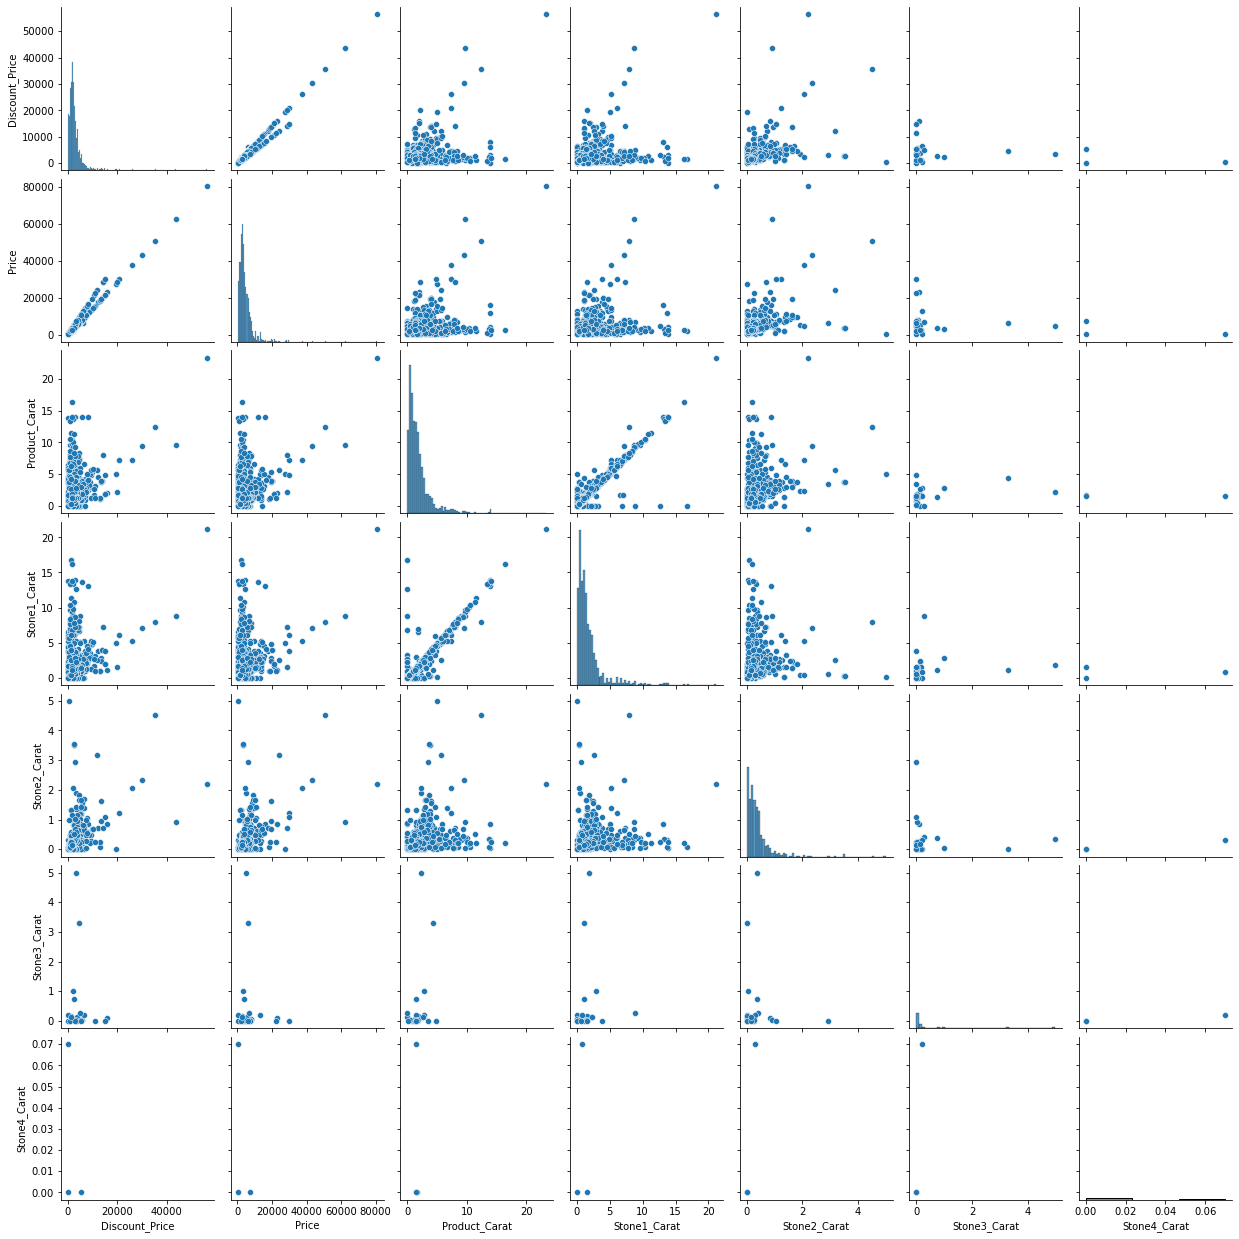

In [11]:
sns.pairplot(df_rings)
plt.show()

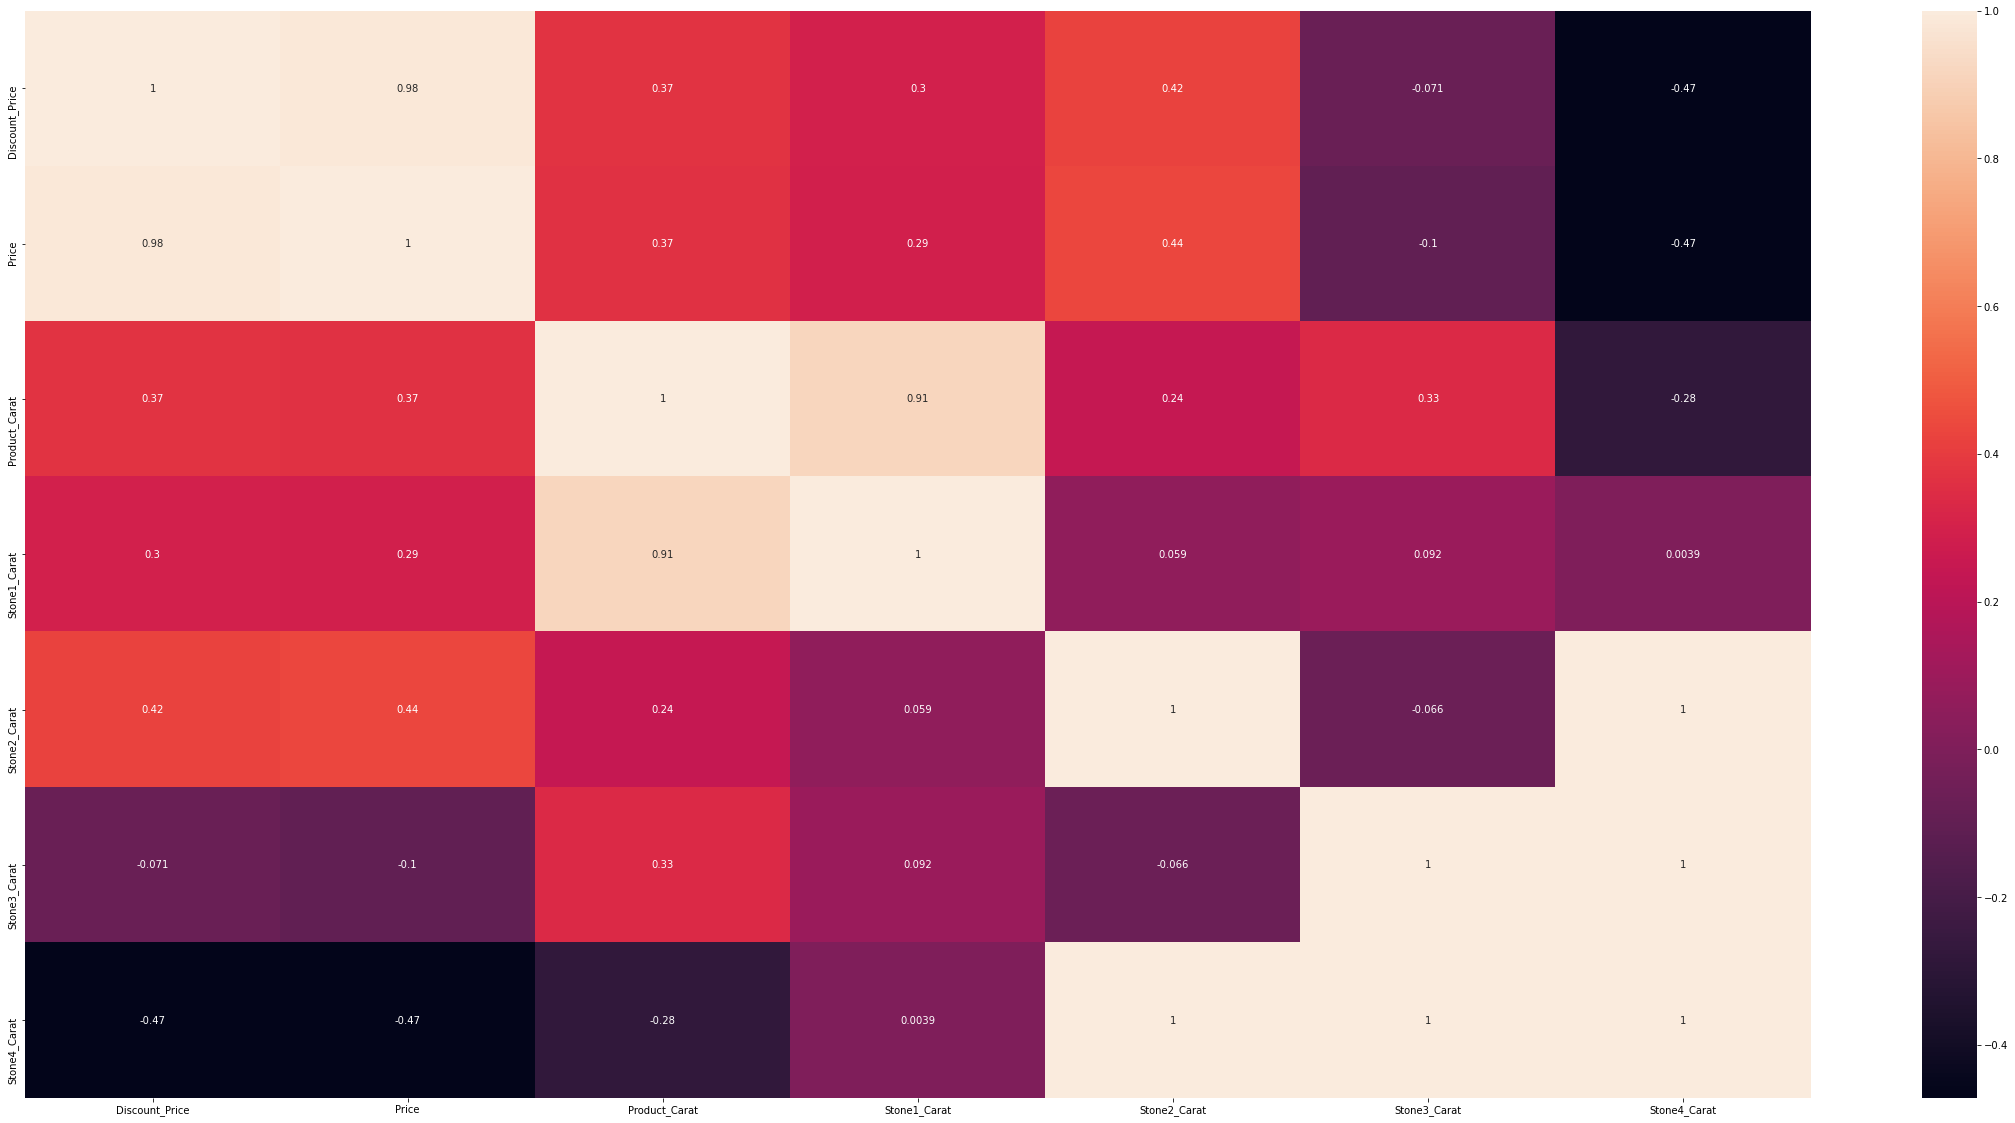

In [12]:
plt.figure(figsize=(40,20))
sns.heatmap(df_rings.corr(), annot=True)
plt.show()

In [13]:
df_rings['Metal'].unique()

array(['14K Gold', '18K Gold', 'Sterling Silver',
       'Sterling Silver & 18K Gold', 'Sterling Silver & 14K Gold',
       'Stainless Steel & 18K Gold', '14k Gold'], dtype=object)

In [14]:
df_rings['Metal'] = df_rings['Metal'].str.replace('14k Gold','14K Gold')

In [15]:
idx = df_rings[df_rings['Metal'] =='Stainless Steel & 18K Gold'].index
df_rings.drop(idx,inplace=True)

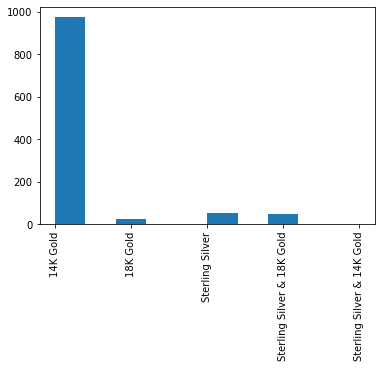

In [16]:
_ = plt.hist(df_rings['Metal'])
plt.xticks(rotation=90)

plt.show()

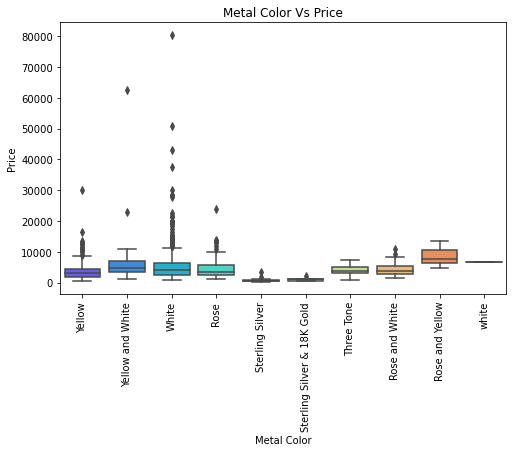

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Metal Color',y='Price',data=df_rings, palette='rainbow')
plt.title("Metal Color Vs Price")
plt.xticks(rotation=90)
plt.show()

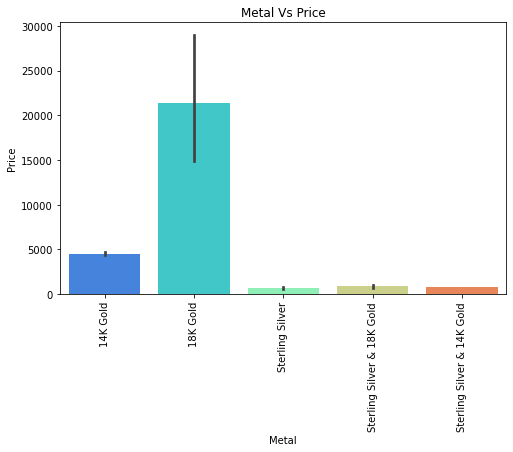

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(x='Metal',y='Price',data=df_rings, palette='rainbow')
plt.title("Metal Vs Price")
plt.xticks(rotation=90)
plt.show()

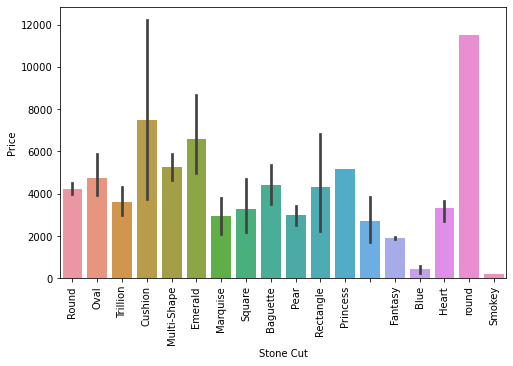

In [19]:
sns.color_palette("flare", as_cmap=True)
plt.figure(figsize=(8,5))
sns.barplot(x='Stone1_Cut',y='Price',data=df_rings)
plt.xlabel('Stone Cut')
#plt.title("Stone1 Cut Vs Price")
plt.xticks(rotation=90)
plt.show()

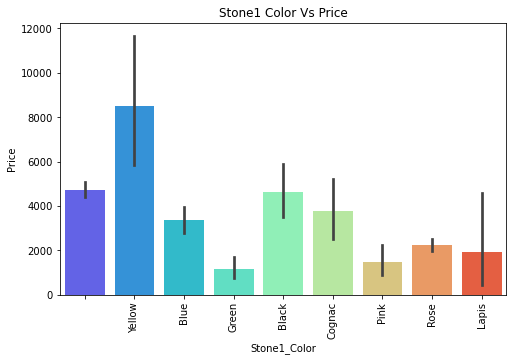

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(x='Stone1_Color',y='Price',data=df_rings, palette='rainbow')
plt.title("Stone1 Color Vs Price")
plt.xticks(rotation=90)
plt.show()

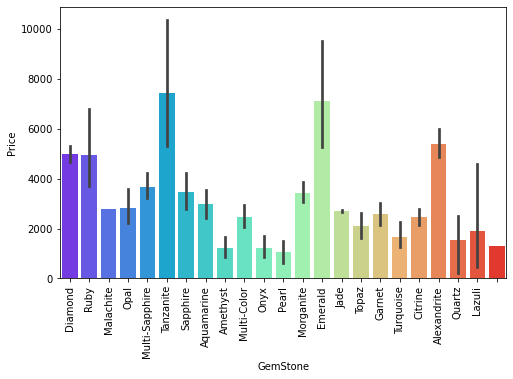

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x='Stone1_Stone',y='Price',data=df_rings,palette='rainbow')
#plt.title("Stone1 Vs Price")
plt.xlabel('GemStone')
plt.xticks(rotation=90)
plt.show()

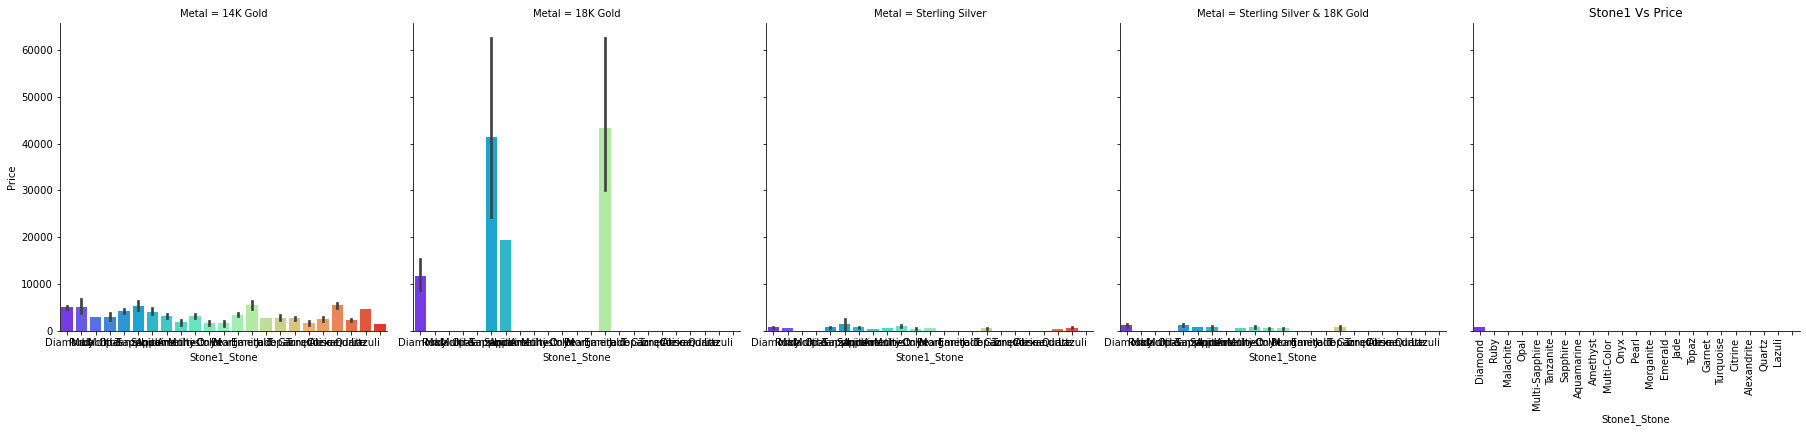

In [22]:
#plt.figure(figsize=(8,5))
sns.catplot(x='Stone1_Stone',y='Price',data=df_rings,col='Metal',palette='rainbow',kind='bar', )
plt.title("Stone1 Vs Price")
plt.xticks(rotation=90)
plt.show()

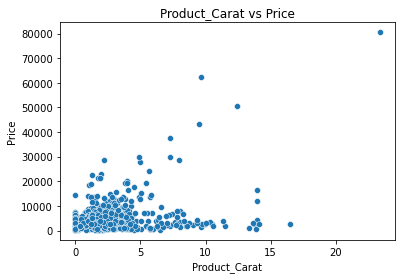

In [23]:
sns.scatterplot(x='Product_Carat', y='Price',data=df_rings)
_ = plt.title('Product_Carat vs Price')
_ = plt.xlabel('Product_Carat')
_ = plt.ylabel('Price')
plt.show()

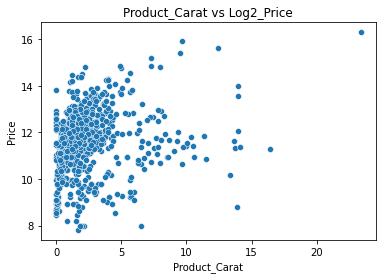

In [24]:
sns.scatterplot(x='Product_Carat', y=np.log2(df_rings['Price']),data=df_rings)
_ = plt.title('Product_Carat vs Log2_Price')
_ = plt.xlabel('Product_Carat')
_ = plt.ylabel('Price')
plt.show()

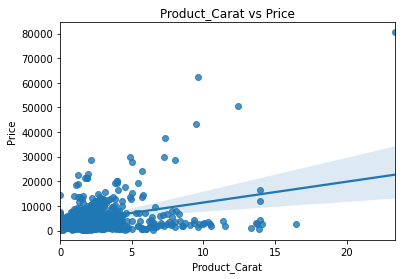

In [25]:
sns.regplot(x='Product_Carat', y='Price',data=df_rings)
_ = plt.title('Product_Carat vs Price')
_ = plt.xlabel('Product_Carat')
_ = plt.ylabel('Price')
plt.show()

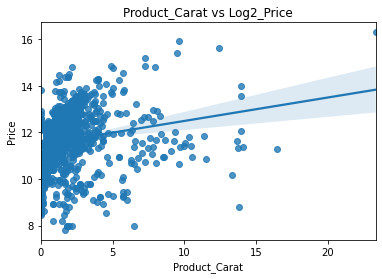

In [26]:
sns.regplot(x='Product_Carat', y=np.log2(df_rings['Price']),data=df_rings)
_ = plt.title('Product_Carat vs Log2_Price')
_ = plt.xlabel('Product_Carat')
_ = plt.ylabel('Price')
plt.show()

In [27]:
# Subsetting our data into our dependent and independent variables.
X = df_rings[["Product_Carat"]]
y = df_rings[["Price"]]

# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [28]:
# We now want to check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(826, 1) (826, 1)
(276, 1) (276, 1)


## Making a Linear Regression model: our first model


In [29]:
#Create the Model
rModel = linear_model.LinearRegression(normalize=True)

In [30]:
#TRain The Model on test data
rModel.fit(X_train, y_train)

LinearRegression(normalize=True)

In [31]:
#Evaluate the model
print(rModel.score(X_train, y_train))

0.1676341789325867


The above score is called R-Squared coefficient, or the "coefficient of determination". It's basically a measure of how successfully our model predicts the variations in the data away from the mean: 1 would mean a perfect model that explains 100% of the variation. At the moment, our model explains only about 16% of the variation from the mean. 

In [32]:
#Use the model to make predictions about our test data
y_pred = rModel.predict(X_test)

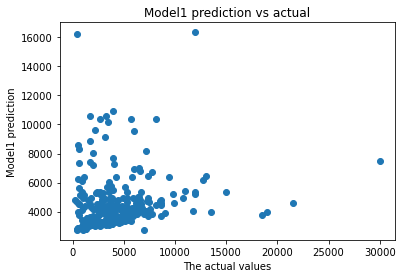

In [33]:
#Plot Predictions against the actual result.
plt.scatter(y_test, y_pred)
plt.title("Model1 prediction vs actual")
plt.xlabel("The actual values")
plt.ylabel("Model1 prediction")

plt.show()

## Making a Linear Regression model: our second model: Ordinary Least Squares (OLS)

In [34]:
X = df_rings[['Product_Carat']]
X = sm.add_constant(X)

y= df_rings[['Price']]

In [35]:
#Split the data using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=123)

In [36]:
#Create the model
rModel2 = sm.OLS(y_train, X_train)

#Fit the model with fit()
rModel2_results = rModel2.fit()

In [37]:
#Evaluate the model with .summary()
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     165.9
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           9.97e-35
Time:                        09:02:54   Log-Likelihood:                -8221.0
No. Observations:                 826   AIC:                         1.645e+04
Df Residuals:                     824   BIC:                         1.646e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2734.1100    233.068     11.731      0.000    2276.633    3191.587
Product_Carat   977.2748     75.863     12.882      0.000     828.368    1126.182
==============================================================================
Omnibus:                      767.933   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43016.286
Skew:                           4.025   Prob(JB):                         0.00
Kurtosis:                      37.425   Cond. No.                         4.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#Use new model to make predictions 
y_pred = rModel2_results.predict(X_test)

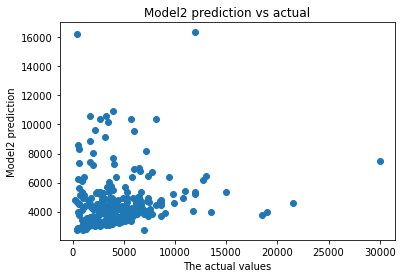

In [39]:
_ = plt.scatter(y_test, y_pred)
plt.title("Model2 prediction vs actual")
plt.xlabel("The actual values")
plt.ylabel("Model2 prediction")

plt.show()

## Conclusion:

Both the models predict 16% variation


## Pre-processing & Training Data Development

In [40]:
df_rings.columns

Index(['Description', 'Discount_Price', 'Price', 'Metal', 'Metal Color',
       'Stones', 'Jewelry_Type', 'Product_Carat', 'Stone1_Desc',
       'Stone1_Carat', 'Stone1_Stone', 'Stone1_Color', 'Stone1_Cut',
       'Stone2_Desc', 'Stone2_Carat', 'Stone2_Stone', 'Stone2_Color',
       'Stone2_Cut', 'Stone3_Desc', 'Stone3_Carat', 'Stone3_Stone',
       'Stone3_Color', 'Stone3_Cut', 'Stone4_Desc', 'Stone4_Carat',
       'Stone4_Stone', 'Stone4_Color', 'Stone4_Cut'],
      dtype='object')

In [41]:
df_rings.isnull().sum()

Description          0
Discount_Price       0
Price                0
Metal                0
Metal Color          0
Stones               0
Jewelry_Type         0
Product_Carat        0
Stone1_Desc          0
Stone1_Carat         0
Stone1_Stone         0
Stone1_Color         0
Stone1_Cut           0
Stone2_Desc        523
Stone2_Carat       523
Stone2_Stone       523
Stone2_Color       523
Stone2_Cut         523
Stone3_Desc       1074
Stone3_Carat      1074
Stone3_Stone      1074
Stone3_Color      1074
Stone3_Cut        1074
Stone4_Desc       1099
Stone4_Carat      1099
Stone4_Stone      1099
Stone4_Color      1099
Stone4_Cut        1099
dtype: int64

In [42]:
#'Discount_Price', 'Price', 'Metal', 'Metal Color','Product_Carat','Stone1_Carat', 'Stone1_Stone', 'Stone1_Color', 'Stone1_Cut',
df_rings_1 = df_rings.drop(['Description','Discount_Price', 'Stones', 'Jewelry_Type','Stone1_Desc','Stone2_Desc','Stone3_Desc','Stone4_Desc'],axis=1)
df_rings_1.columns

Index(['Price', 'Metal', 'Metal Color', 'Product_Carat', 'Stone1_Carat',
       'Stone1_Stone', 'Stone1_Color', 'Stone1_Cut', 'Stone2_Carat',
       'Stone2_Stone', 'Stone2_Color', 'Stone2_Cut', 'Stone3_Carat',
       'Stone3_Stone', 'Stone3_Color', 'Stone3_Cut', 'Stone4_Carat',
       'Stone4_Stone', 'Stone4_Color', 'Stone4_Cut'],
      dtype='object')

<AxesSubplot:>

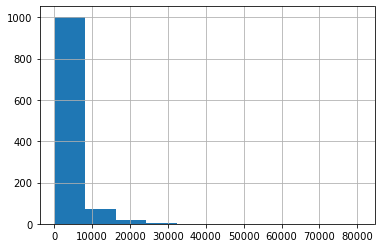

In [43]:
df_rings_1['Price'].hist()

In [44]:
#Create label for price
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#used for expanding the no o viible columns of dataframe

df_rings_1['Price'].value_counts().sort_values(ascending=False)

2995.0     30
3995.0     22
3295.0     19
2595.0     18
1995.0     17
2495.0     17
2895.0     16
2195.0     15
2795.0     15
3495.0     14
3595.0     13
2695.0     13
3795.0     13
4495.0     13
1695.0     13
5995.0     13
1595.0     12
2395.0     12
995.0      12
4595.0     11
3695.0     11
4295.0     11
1350.0     11
5295.0     10
3395.0     10
1195.0     10
5795.0     10
3195.0     10
7995.0      9
895.0       9
6995.0      9
495.0       9
1795.0      9
1295.0      9
5495.0      8
1895.0      8
2250.0      8
1850.0      8
4995.0      8
3450.0      8
2750.0      8
950.0       8
1495.0      8
650.0       8
6595.0      7
2650.0      7
1950.0      7
3600.0      7
3150.0      7
4395.0      7
1395.0      7
4695.0      7
4195.0      7
2350.0      7
1750.0      6
695.0       6
5595.0      6
795.0       6
550.0       6
12995.0     6
3750.0      6
4450.0      6
6495.0      6
3095.0      6
3895.0      6
5500.0      6
7195.0      6
4895.0      6
6695.0      6
2295.0      6
10995.0     6
7495.0

In [45]:
df_rings_1['Price_Category'] = pd.cut(df_rings_1['Price'], bins=[0,2000,4000,6000,7000,8000,9000,10000,20000,30000,np.inf], labels=[1,2,3,4,5,6,7,8,9,10])
df_rings_1 = df_rings_1.drop('Price',axis=1)
    

In [46]:

df_rings_1['Stone2_Carat'].fillna(0, inplace=True)
df_rings_1['Stone3_Carat'].fillna(0, inplace=True)
df_rings_1['Stone4_Carat'].fillna(0, inplace=True)

df_rings_1['Product_Carat'] = round(df_rings_1['Product_Carat']).astype("int64").astype("category")

df_rings_1['Stone1_Carat'] = round(df_rings_1['Stone1_Carat']).astype("int64").astype("category")

df_rings_1['Stone2_Carat'] = round(df_rings_1['Stone2_Carat']).astype("int64").astype("category")

df_rings_1['Stone3_Carat'] = round(df_rings_1['Stone3_Carat']).astype("int64").astype("category")

df_rings_1['Stone4_Carat'] = round(df_rings_1['Stone4_Carat']).astype("int64").astype("category")



In [47]:
df_rings_1.head()

,Metal,Metal Color,Product_Carat,Stone1_Carat,Stone1_Stone,Stone1_Color,Stone1_Cut,Stone2_Carat,Stone2_Stone,Stone2_Color,Stone2_Cut,Stone3_Carat,Stone3_Stone,Stone3_Color,Stone3_Cut,Stone4_Carat,Stone4_Stone,Stone4_Color,Stone4_Cut,Price_Category
413,14K Gold,Yellow,2,1,Diamond,,Round,0,Diamond,Black,Round,0,Ruby,,Round,0,NaN,NaN,NaN,6
414,18K Gold,Yellow and White,1,1,Diamond,Yellow,Round,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,5
415,14K Gold,Yellow,0,0,Diamond,,Round,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,1
416,14K Gold,White,2,2,Ruby,,Oval,1,Diamond,,Multi-Shape,0,NaN,NaN,NaN,0,NaN,NaN,NaN,8
417,14K Gold,White,4,2,Ruby,,Oval,2,Diamond,,Round,0,NaN,NaN,NaN,0,NaN,NaN,NaN,7


In [48]:
df_rings_1['Stone3_Cut'] = df_rings_1['Stone3_Cut'].str.replace('Frog','')
df_rings_1['Stone3_Cut'] = df_rings_1['Stone3_Cut'].str.replace('10mm','')

In [49]:
X = df_rings_1.drop(columns='Price_Category')
y = df_rings_1.Price_Category

In [50]:
y.value_counts()

2     394
1     261
3     224
4      66
8      53
5      48
6      28
7      12
9      11
10      5
Name: Price_Category, dtype: int64

In [51]:
#Change category columns to One Hot Encoding
df_dummy_rings = pd.get_dummies(X)
df_dummy_rings.shape

(1102, 177)

In [52]:
df_dummy_rings.isnull().sum().sort_values(ascending=False)

Stone4_Cut_Round                          0
Stone1_Cut_Heart                          0
Stone1_Stone_Onyx                         0
Stone1_Stone_Multi-Sapphire               0
Stone1_Stone_Multi-Color                  0
Stone1_Stone_Morganite                    0
Stone1_Stone_Malachite                    0
Stone1_Stone_Lazuli                       0
Stone1_Stone_Jade                         0
Stone1_Stone_Garnet                       0
Stone1_Stone_Emerald                      0
Stone1_Stone_Diamond                      0
Stone1_Stone_Citrine                      0
Stone1_Stone_Aquamarine                   0
Stone1_Stone_Amethyst                     0
Stone1_Stone_Alexandrite                  0
Stone1_Stone_                             0
Stone1_Carat_21                           0
Stone1_Carat_17                           0
Stone1_Carat_16                           0
Stone1_Carat_14                           0
Stone1_Stone_Opal                         0
Stone1_Stone_Pearl              

In [53]:
df_rings_1.columns

Index(['Metal', 'Metal Color', 'Product_Carat', 'Stone1_Carat', 'Stone1_Stone',
       'Stone1_Color', 'Stone1_Cut', 'Stone2_Carat', 'Stone2_Stone',
       'Stone2_Color', 'Stone2_Cut', 'Stone3_Carat', 'Stone3_Stone',
       'Stone3_Color', 'Stone3_Cut', 'Stone4_Carat', 'Stone4_Stone',
       'Stone4_Color', 'Stone4_Cut', 'Price_Category'],
      dtype='object')

In [54]:
print(df_dummy_rings.columns.tolist())

['Metal_14K Gold', 'Metal_18K Gold', 'Metal_Sterling Silver', 'Metal_Sterling Silver & 14K Gold', 'Metal_Sterling Silver & 18K Gold', 'Metal Color_Rose', 'Metal Color_Rose and White', 'Metal Color_Rose and Yellow', 'Metal Color_Sterling Silver', 'Metal Color_Sterling Silver & 18K Gold', 'Metal Color_Three Tone', 'Metal Color_White', 'Metal Color_Yellow', 'Metal Color_Yellow and White', 'Metal Color_white', 'Product_Carat_0', 'Product_Carat_1', 'Product_Carat_2', 'Product_Carat_3', 'Product_Carat_4', 'Product_Carat_5', 'Product_Carat_6', 'Product_Carat_7', 'Product_Carat_8', 'Product_Carat_9', 'Product_Carat_10', 'Product_Carat_11', 'Product_Carat_12', 'Product_Carat_13', 'Product_Carat_14', 'Product_Carat_16', 'Product_Carat_23', 'Stone1_Carat_0', 'Stone1_Carat_1', 'Stone1_Carat_2', 'Stone1_Carat_3', 'Stone1_Carat_4', 'Stone1_Carat_5', 'Stone1_Carat_6', 'Stone1_Carat_7', 'Stone1_Carat_8', 'Stone1_Carat_9', 'Stone1_Carat_10', 'Stone1_Carat_11', 'Stone1_Carat_13', 'Stone1_Carat_14', 'Sto

In [55]:
#Split your data into testing and training datasets
X_train, X_test, y_train, y_test = train_test_split(df_dummy_rings, y, test_size=0.3, 
                                                    random_state=47)

In [56]:
X_train.shape, X_test.shape

((771, 177), (331, 177))

## Logistic Regression

In [57]:
from sklearn.model_selection import RepeatedStratifiedKFold

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.521414 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.507554 (0.038083) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.507990 (0.036215) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.507124 (0.033800) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.517082 (0.034413) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.518384 (0.035840) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.512760 (0.032334) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.521414 (0.038388) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.520550 (0.037806) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.511474 (0.034947) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.484665 (0.037374) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.484665 (0.037374) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.474291 (0.034902) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.427587 (0.024148) wit

In [58]:
m = LogisticRegression(C=1.0, penalty= 'l2', solver = 'newton-cg')
m.fit(X_train,y_train)
importances = pd.DataFrame(data={'Attribute':X_train.columns, 'Importance':m.coef_[0]})
importances = importances.sort_values(by='Importance',ascending=False)

#importances


In [59]:
#np.array(y_test.tolist())
from sklearn.model_selection import cross_val_score

score=m.score(X_test, y_test)
print("Test Accuracy Score: ", score)

scores = cross_val_score(m,X_train,y_train,cv=4,scoring='accuracy')
print("Cross Validation Accuracy Scores: ", scores)

print("Cross Validation min: {} , mean: {} , max :{}".format(scores.min(), scores.mean(), scores.max() ))

Test Accuracy Score:  0.5166163141993958
Cross Validation Accuracy Scores:  [0.53367876 0.53367876 0.51295337 0.52604167]
Cross Validation min: 0.5129533678756477 , mean: 0.5265881368739206 , max :0.533678756476684


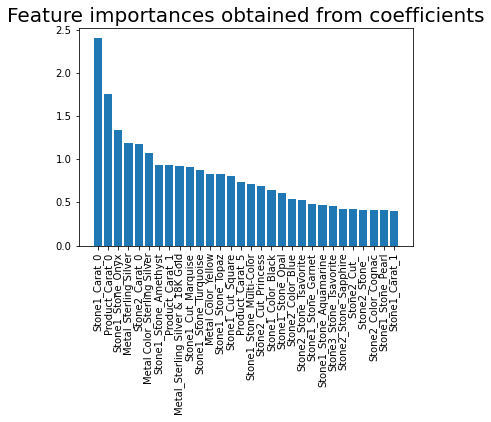

In [60]:
plt.bar(x=importances['Attribute'][:30], height=importances['Importance'][:30])
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [61]:
y_pred = m.predict(X_test)
print("The Accuracy score of prediction: " ,accuracy_score(y_test, y_pred))

The Accuracy score of prediction:  0.5166163141993958


In [62]:
#Create Confusion Matrix Plot 
from sklearn.metrics import confusion_matrix
labels=[1,2,3,4,5,6,7,8,9,10]
cm = confusion_matrix(y_test, y_pred,labels )
print(cm)

[[61 24  0  0  0  0  0  0  0  0]
 [20 71 26  3  0  0  0  0  0  0]
 [ 2 27 30  2  1  0  0  1  0  0]
 [ 0  5  8  1  4  0  0  1  0  0]
 [ 0  4  9  1  0  1  0  1  0  0]
 [ 0  0  1  0  2  2  0  0  0  0]
 [ 0  0  2  0  0  1  0  2  0  0]
 [ 1  1  3  0  1  0  0  6  0  0]
 [ 0  1  0  1  1  0  0  2  0  0]
 [ 0  0  1  0  0  0  0  0  0  0]]


<ipython-input-63-d488826aaf8d>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-63-d488826aaf8d>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


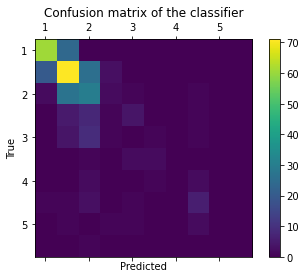

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [64]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test,y_pred, average='weighted')

print('Precision Score: ', precision)
print('Recall Score:', recall)

Precision Score:  0.48285438788698454
Recall Score: 0.5166163141993958


/Users/rupalgandhre/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.73      0.72      0.72        85
           2       0.53      0.59      0.56       120
           3       0.38      0.48      0.42        63
           4       0.12      0.05      0.07        19
           5       0.00      0.00      0.00        16
           6       0.50      0.40      0.44         5
           7       0.00      0.00      0.00         5
           8       0.46      0.50      0.48        12
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         1

    accuracy                           0.52       331
   macro avg       0.27      0.27      0.27       331
weighted avg       0.48      0.52      0.50       331



/Users/rupalgandhre/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest Model 

In [66]:
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),http://localhost:8888/notebooks/SpringBoard/DataScience_Capstone2/notebooks/Effy_EDA_Rings.ipynb#
#and then RandomForestClassifier with a random state of 47
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestClassifier(random_state=47)
)

In [67]:
#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

/Users/rupalgandhre/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [68]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.51612903, 0.51298701, 0.53246753, 0.54545455, 0.49350649])

In [69]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.5201089233347298, 0.017716580895235687)

In [70]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestclassifier__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params



{'randomforestclassifier__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [71]:
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [72]:
#Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. This may take a minute or two.
rf_grid_cv.fit(X_train, y_train)

/Users/rupalgandhre/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__n_estimators': [10, 12, 16,
                                                                  20, 26, 33,
                                                                  42, 54, 69,
                                                                  88, 112, 143,
                                                                  183, 233, 297,
                                                                  379, 483, 615,
                                                                  784, 1000],
                         'simpleimputer__str

In [73]:
#Print the best params (`best_params_` attribute) from the grid search
rf_grid_cv.best_params_

{'randomforestclassifier__n_estimators': 784,
 'simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

In [74]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

/Users/rupalgandhre/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


array([0.53548387, 0.54545455, 0.52597403, 0.53896104, 0.48701299])

In [75]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.5265772936740679, 0.02075925429630975)

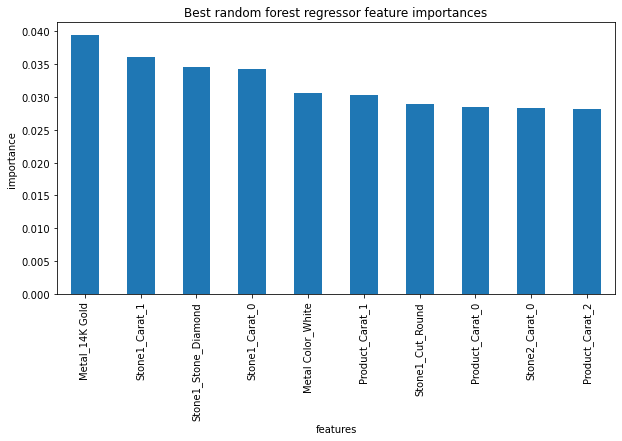

In [76]:
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestclassifier` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestclassifier.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.head(10).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

In [77]:
X_train.columns

Index(['Metal_14K Gold', 'Metal_18K Gold', 'Metal_Sterling Silver',
       'Metal_Sterling Silver & 14K Gold', 'Metal_Sterling Silver & 18K Gold',
       'Metal Color_Rose', 'Metal Color_Rose and White',
       'Metal Color_Rose and Yellow', 'Metal Color_Sterling Silver',
       'Metal Color_Sterling Silver & 18K Gold',
       ...
       'Stone3_Cut_Panther', 'Stone3_Cut_Round', 'Stone3_Cut_Top',
       'Stone4_Carat_0', 'Stone4_Stone_Citrine', 'Stone4_Stone_Garnet',
       'Stone4_Stone_Green', 'Stone4_Color_ ', 'Stone4_Cut_ ',
       'Stone4_Cut_Round'],
      dtype='object', length=177)

In [78]:
rf_feat_imps.head(10)

Metal_14K Gold          0.039379
Stone1_Carat_1          0.035990
Stone1_Stone_Diamond    0.034547
Stone1_Carat_0          0.034196
Metal Color_White       0.030633
Product_Carat_1         0.030323
Stone1_Cut_Round        0.028846
Product_Carat_0         0.028432
Stone2_Carat_0          0.028242
Product_Carat_2         0.028224
dtype: float64

In [79]:
y_pred = rf_grid_cv.predict(X_test)

y_pred

array([2, 3, 2, 1, 4, 2, 1, 1, 2, 2, 3, 3, 2, 2, 3, 1, 5, 1, 1, 3, 1, 2,
       2, 6, 3, 1, 8, 1, 2, 2, 1, 3, 3, 2, 1, 3, 1, 3, 2, 1, 1, 2, 1, 3,
       7, 2, 2, 1, 2, 3, 2, 2, 3, 2, 2, 8, 1, 6, 2, 1, 3, 2, 5, 2, 3, 2,
       6, 3, 2, 5, 2, 3, 1, 1, 1, 8, 3, 3, 3, 1, 2, 2, 1, 1, 1, 3, 2, 2,
       5, 1, 2, 3, 1, 2, 1, 1, 1, 5, 3, 2, 2, 1, 3, 2, 2, 8, 2, 1, 2, 8,
       3, 1, 3, 1, 2, 8, 2, 2, 1, 3, 3, 3, 5, 2, 2, 1, 3, 2, 1, 3, 3, 1,
       2, 1, 2, 2, 2, 1, 2, 1, 3, 3, 2, 2, 1, 5, 2, 2, 2, 1, 1, 3, 7, 2,
       1, 2, 3, 2, 1, 1, 7, 6, 3, 2, 1, 4, 3, 4, 6, 1, 1, 2, 3, 2, 1, 2,
       3, 1, 2, 1, 2, 5, 2, 3, 3, 2, 2, 3, 1, 3, 5, 3, 4, 2, 1, 1, 2, 6,
       6, 3, 2, 2, 2, 1, 3, 2, 1, 1, 1, 7, 3, 3, 1, 2, 2, 1, 3, 3, 2, 3,
       3, 3, 2, 2, 3, 2, 1, 2, 8, 3, 1, 1, 3, 2, 2, 2, 2, 2, 1, 6, 8, 3,
       1, 2, 3, 2, 3, 2, 1, 2, 3, 1, 1, 1, 3, 2, 2, 4, 3, 3, 4, 2, 3, 1,
       2, 2, 8, 6, 2, 1, 1, 1, 3, 2, 2, 3, 1, 1, 2, 3, 3, 1, 2, 2, 2, 1,
       1, 2, 2, 3, 1, 2, 3, 3, 1, 2, 1, 1, 2, 2, 2,

In [80]:
print("The Accuracy score of Random Forest prediction: " ,accuracy_score(y_test, y_pred))

The Accuracy score of Random Forest prediction:  0.525679758308157
